# Find the shortest path

Described below is a short algorithm to find the shortest path on a checkerboard pattern to a specific cell.

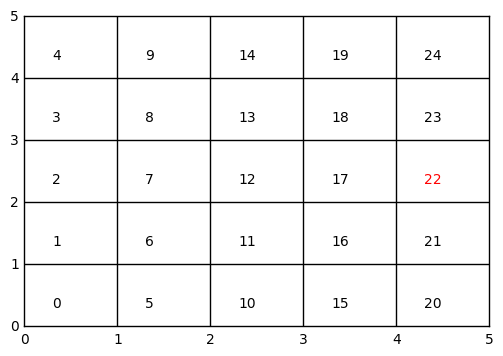

In [1]:
import matplotlib.pyplot as plt
import numpy as np

plt.hold(True)
for ln in range(1, 5):
    plt.plot((0, 5), (ln, ln), color=(0., 0., 0.))
    plt.plot((ln, ln), (0, 5), color=(0., 0., 0.))
for itm in range(0, 25):
    if itm == 22:
        plt.text(np.floor(itm/5)+0.3, itm%5 + 0.3, str(itm), color=(1., 0., 0.))
    else:
        plt.text(np.floor(itm/5)+0.3, itm%5 + 0.3, str(itm))
plt.show()

Fields 22 is adjacent to the exit from the gameboard. Any horizontal step and any vertical step takes one time unit. Therefore to reach the exti from fields 22 takes one time unit. Any field adjacent to 22 takes an extra time unit and so on.

## Python implementation

Each cell is represented as a class that holds a reference to each adjacent cell.

In [2]:
class Cell:
    def __init__(self, number):
        self.number = number
        self.weight = 0
        self.neighbors = []

The gameboard is created by creating the cells and linking them so each cell knows its neighbors. Each cell in the middle has four neigbors; each cell on the edge has three neighbors; each corner cell has two neighbors.

In [3]:
def create_gameboard():
    gameboard = [Cell(i) for i in range(25)]
    for i in range(25):
        gameboard[i].number = i
        if i % 5 != 4:
            gameboard[i].neighbors.append(gameboard[i+1])
        if i % 5 != 0:
            gameboard[i].neighbors.append(gameboard[i-1])
        if i >= 5:
            gameboard[i].neighbors.append(gameboard[i-5])
        if i < 20:
            gameboard[i].neighbors.append(gameboard[i+5])
    return gameboard

To calculate the weights of each cell walk back from the end cell and increase the weight of each cell reached by one for each successive step.

In [4]:
def calc_weights(end_points):
    current_cells = end_points

    step = 1
    while len(current_cells):
        next_cells = []
        for cell in current_cells:
            cell.weight = step
            next_cells.extend([itm for itm in cell.neighbors
                               if itm.weight == 0])
        step += 1
        current_cells = next_cells

Get the end cells, and calculate the weight for the gameboard.

In [5]:
gameboard = create_gameboard()
end_cells = [cell for cell in gameboard if cell.number==22]
calc_weights(end_cells)

Plot the gameboard and instead of the cell numbers write the weight of each cell on the board.

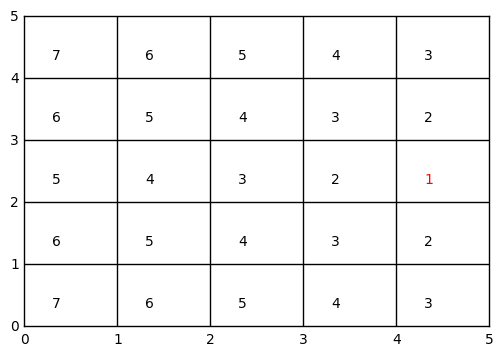

In [6]:
plt.hold(True)
for ln in range(1, 5):
    plt.plot((0, 5), (ln, ln), color=(0., 0., 0.))
    plt.plot((ln, ln), (0, 5), color=(0., 0., 0.))
for i in range(0, 25):
    no = gameboard[i].number
    if gameboard[i] in end_cells:
        plt.text(np.floor(no/5)+0.3, no%5 + 0.3,
                 str(gameboard[i].weight), color=(1., 0., 0.))
    else:
        plt.text(np.floor(no/5)+0.3, no%5 + 0.3,
                 str(gameboard[i].weight))
plt.show()

## Non passable cells

Some cells may not be passable (e.g. they are blocked by an object). If a cell cannot be passed it will be skipped when walking the the cells back from the end cells. The cells can simply be removed from the gameboard. Since constantly recreating the gameboard may be unncessarily difficult it may be easier to mark a cell as non passable and ignore those cells when walking the gameboard.

In [7]:
class Cell:
    def __init__(self, number):
        self.number = number
        self.weight = 0
        self.neighbors = []
        self.passable = True

The new algorithm has to check if a cell is passable.

In [8]:
def calc_weights(end_points):
    current_cells = end_points

    step = 1
    while len(current_cells):
        next_cells = []
        for cell in current_cells:
            cell.weight = step
            next_cells.extend([itm for itm in cell.neighbors
                               if (itm.weight == 0 and itm.passable == True)])
        step += 1
        current_cells = next_cells

Create a new gameboard; set some cells to non passable and calculate the weights.

In [9]:
gameboard = create_gameboard()
for i in [5, 7, 8, 19, 17, 16]:
    gameboard[i].passable = False
end_cells = [cell for cell in gameboard if cell.number==22]
calc_weights(end_cells)

When drawing the gameboard leave non passable cells blank.

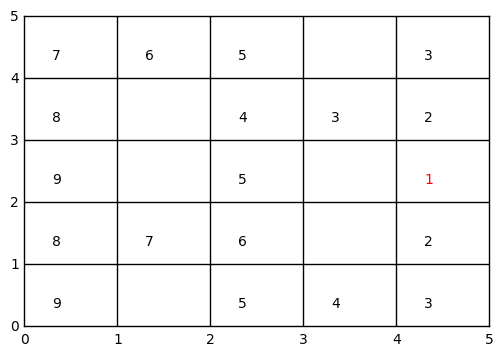

In [10]:
plt.hold(True)
for ln in range(1, 5):
    plt.plot((0, 5), (ln, ln), color=(0., 0., 0.))
    plt.plot((ln, ln), (0, 5), color=(0., 0., 0.))
for i in range(len(gameboard)):
    if gameboard[i].passable == False:
        continue
    no = gameboard[i].number
    if gameboard[i] in end_cells:
        plt.text(np.floor(no/5)+0.3, no%5 + 0.3,
                 str(gameboard[i].weight), color=(1., 0., 0.))
    else:
        plt.text(np.floor(no/5)+0.3, no%5 + 0.3,
                 str(gameboard[i].weight))
plt.show()

## Fields with additional penalty

Some fields may have an additional penalty. The penalty may be used to indicate fields that should not be transversed (i.e. fields where a gamepiece might be damaged). That penalty has to be added to the weight on top of the time units it takes to reach the exit. That way a shortest way can be found while making sure the shortest way goes around fields that should be avoided.

The new Cell class holds the extra penalty.

In [11]:
class Cell:
    def __init__(self, number):
        self.number = number
        self.weight = 0
        self.neighbors = []
        self.passable = True
        self.extra_penalty = 0

Since each cell's weight is based on the number of steps the cell is from the end point, as well as the cell's extra penalty, as well as the extra penealties in the path between the cell and the end cell a cell's value can no longer be assigned solely based on the number of cells between the cell and the end cell. A longer path may yield a lower weight if the shorter path contains extra penalties.

A cell's weight must be the lowest weight possible because the shortest possible path is sought.

In [12]:
def calc_weights(end_points):
    current_cells = end_points
    for cell in current_cells:
        cell.weight = 1 + cell.extra_penalty
        
    while len(current_cells):
        next_cells = set()
        for cell in current_cells:
            for next_cell in cell.neighbors:
                if next_cell.passable == False:
                    continue
                new_weight = cell.weight + next_cell.extra_penalty + 1
                if new_weight < next_cell.weight or next_cell.weight == 0 :
                    next_cell.weight = new_weight
                    next_cells.add(next_cell)

        current_cells = next_cells

In [13]:
gameboard = create_gameboard()
for i in [5, 7, 8, 19, 17, 16]:
    gameboard[i].passable = False
gameboard[6].extra_penalty = 2
end_cells = [itm for itm in gameboard
             if itm.number==22 or itm.number==21]
calc_weights(end_cells)

Plot the gameboard and show the extra penalty in bracets.

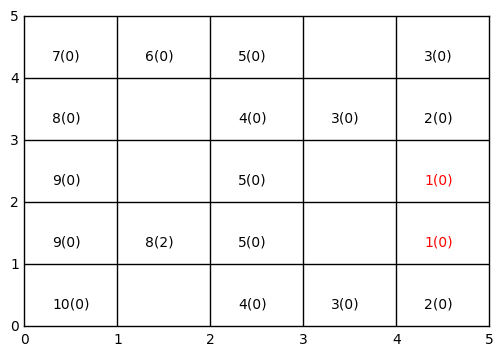

In [14]:
plt.hold(True)
for ln in range(1, 5):
    plt.plot((0, 5), (ln, ln), color=(0., 0., 0.))
    plt.plot((ln, ln), (0, 5), color=(0., 0., 0.))
for i in range(len(gameboard)):
    if gameboard[i].passable == False:
        continue
    no = gameboard[i].number
    if gameboard[i] in end_cells:
        plt.text(np.floor(no/5)+0.3, no%5 + 0.3, "{0:d}({1:d})".format(
            gameboard[i].weight, gameboard[i].extra_penalty),
                color=(1., 0., 0.))
    else:
        plt.text(np.floor(no/5)+0.3, no%5 + 0.3, "{0:d}({1:d})".format(
            gameboard[i].weight, gameboard[i].extra_penalty))
plt.show()

## Example

In [15]:
gameboard = create_gameboard()
for i in [16, 17, 18, 6, 7, 8, 9]:
    gameboard[i].passable = False
gameboard[20].extra_penalty = 10
end_cells = [itm for itm in gameboard if itm.number==22]
calc_weights(end_cells)

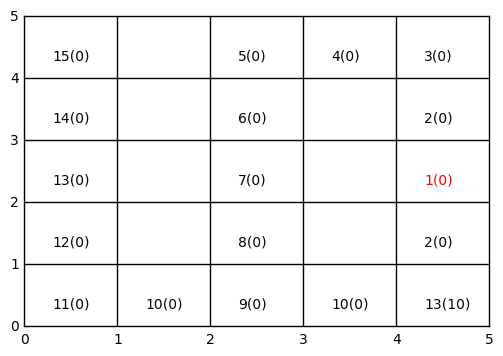

In [16]:
plt.hold(True)
for ln in range(1, 5):
    plt.plot((0, 5), (ln, ln), color=(0., 0., 0.))
    plt.plot((ln, ln), (0, 5), color=(0., 0., 0.))
for i in range(len(gameboard)):
    if gameboard[i].passable == False:
        continue
    no = gameboard[i].number
    if gameboard[i] in end_cells:
        plt.text(np.floor(no/5)+0.3, no%5 + 0.3, "{0:d}({1:d})".format(
            gameboard[i].weight, gameboard[i].extra_penalty),
                color=(1., 0., 0.))
    else:
        plt.text(np.floor(no/5)+0.3, no%5 + 0.3, "{0:d}({1:d})".format(
            gameboard[i].weight, gameboard[i].extra_penalty))
plt.show()